<a href="https://colab.research.google.com/github/Md819-max/site/blob/main/Credit_card_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/final_credit_card_approval_dataset._classification.csv')

In [ ]:
df.head(2)

,customer_id,age,gender,income,employment_status,years_at_job,credit_score,existing_credit_cards,has_mortgage,approved
0,0,59,Male,68738.03,Student,19,656,3,No,1
1,1,49,Male,57371.07,Employed,4,841,3,No,1


In [ ]:
df.columns

Index(['customer_id', 'age', 'gender', 'income', 'employment_status',
       'years_at_job', 'credit_score', 'existing_credit_cards', 'has_mortgage',
       'approved'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
income,0
employment_status,0
years_at_job,0
credit_score,0
existing_credit_cards,0
has_mortgage,0
approved,0


In [ ]:
import missingno as msno

<Axes: >

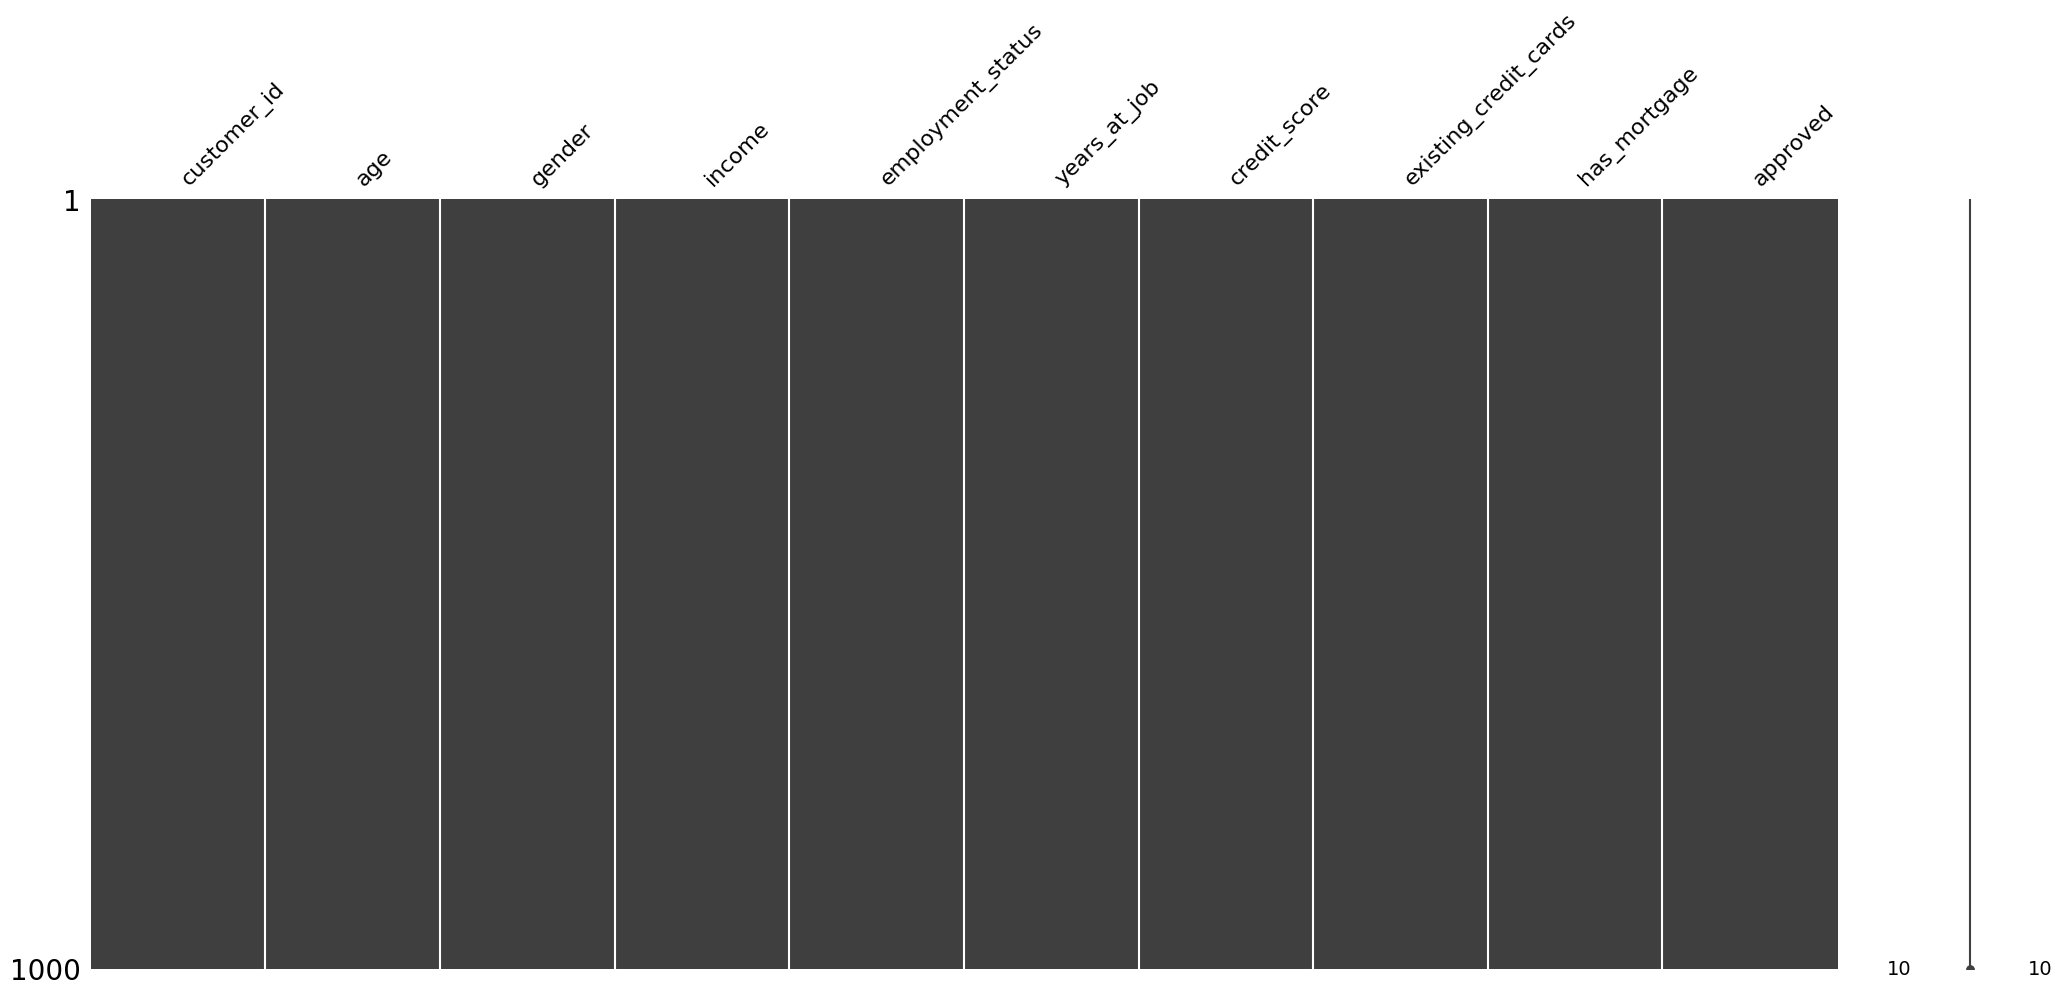

In [ ]:
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   gender                 1000 non-null   object 
 3   income                 1000 non-null   float64
 4   employment_status      1000 non-null   object 
 5   years_at_job           1000 non-null   int64  
 6   credit_score           1000 non-null   int64  
 7   existing_credit_cards  1000 non-null   int64  
 8   has_mortgage           1000 non-null   object 
 9   approved               1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [ ]:
df = df.drop(columns='customer_id')

In [ ]:
df.select_dtypes(include='number').columns

Index(['age', 'income', 'years_at_job', 'credit_score',
       'existing_credit_cards', 'approved'],
      dtype='object')

In [ ]:
number_columns = ['age','income','years_at_job','credit_score','existing_credit_cards']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [ ]:
for i in number_columns:
  minmax.fit(df[[i]])
  df[i] = minmax.fit_transform(df[[i]])


In [ ]:
df.select_dtypes(include='object').columns

Index(['gender', 'employment_status', 'has_mortgage'], dtype='object')

In [ ]:
dfg = pd.get_dummies(df['gender']).astype(int)
df = pd.concat([df,dfg],axis=1)
df = df.drop(columns='has_mortgage')

In [ ]:
dfe = pd.get_dummies(df['employment_status']).astype(int)
df = pd.concat([df,dfe],axis=1)
df = df.drop(columns='employment_status')

In [ ]:
dfh = pd.get_dummies(df['has_mortage']).astype(int)
df = pd.concat([df,dfh],axis=1)
df = df.drop(columns='has_mortgage')

KeyError: 'has_mortage'

In [ ]:
# prompt: credit card analysis make all regression model 'customer_id', 'age', 'gender', 'income', 'employment_status',
#        'years_at_job', 'credit_score', 'existing_credit_cards', 'has_mortgage',
#        'approved'],
#       dtype='object

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'approved' is the target variable
X = df.drop('approved', axis=1)
y = df['approved']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "report": report}
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("-" * 30)

# Print the results
for name, res in results.items():
    print(f"Results for {name}:")
    print(f"  Accuracy: {res['accuracy']:.4f}")
    print("  Classification Report:")
    print(res['report'])
    print("=" * 50)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9200
------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.9950
------------------------------
Training Random Forest...
Random Forest Accuracy: 1.0000
------------------------------
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9950
------------------------------
Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9200
------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.8950
------------------------------
Training Gaussian Naive Bayes...
Gaussian Naive Bayes Accuracy: 0.5750
------------------------------
Results for Logistic Regression:
  Accuracy: 0.9200
  Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.85      0.85      0.85        53

    accuracy                           0.92       200
   macro avg       0.90  